## Analyse et Visualisation de Données avec Python : Prédiction des prix des voitures

In [79]:
import numpy as np #manipulation
import pandas as pd #traitement et l'analyse
import seaborn as sns #la visualisation
import matplotlib.pyplot as plt # Création de Graphique
plt.style.use("ggplot")  #pour le style ggplot

import plotly.express as px # Création de Graphe Dynamique
%matplotlib inline

import warnings # eliminer les erreurs de version
warnings.filterwarnings("ignore")

## Chargement et Aperçu du Fichier Excel

In [80]:
# chemin vers le fichier qui contient des données qu'on vas utiliser 
file_path = r"C:\Users\USER\Desktop\Wandaloo\WandalooCarsData.xlsx"

# lire les données du fichier
df = pd.read_excel(file_path)

# maitenant travaillons avec ' df '
df.head() # afficher les 5 premières lignes 

,Title_URL,Marque,Modele,Annee,Ville,Vendeur,Main,Kilometrage,Carburant,Transmission,Puissance_fiscale,Puissance_dynamique,Couleur,Etat,Prix
0,https://www.wandaloo.com/occasion/volkswagen-c...,VOLKSWAGEN,CC,2017.0,Mohammadia,Particulier,Première,111.000 km,Diesel,Automatique,8 cv,140 ch,Blanc,Excellent,185.000 DH
1,https://www.wandaloo.com/occasion/audi-q3-dies...,AUDI,Q3,2017.0,Marrakech,Particulier,Première,76.000 km,Diesel,Automatique,NaN,NaN,NaN,NaN,285.000 DH
2,https://www.wandaloo.com/occasion/volkswagen-t...,VOLKSWAGEN,Tiguan,2014.0,Mohammadia,Particulier,Seconde,204.000 km,Diesel,Automatique,8 cv,150 ch,Bleu foncé,Excellent,215.000 DH
3,https://www.wandaloo.com/occasion/mercedes-cla...,MERCEDES,Classe E,2010.0,Temara,Particulier,Seconde,255.000 km,Diesel,Automatique,12 cv,300 ch,Noir,Très bon,150.000 DH
4,https://www.wandaloo.com/occasion/hyundai-acce...,HYUNDAI,Accent,2014.0,Tanger,Particulier,Première,170.000 km,Diesel,Automatique,NaN,NaN,NaN,NaN,110.000 DH


## Nous allons supprimer la colonne 'Titre_URL' car elle ne joue aucun rôle dans la prédiction du prix des voitures

In [81]:
df.drop(columns=["Title_URL"], inplace=True)
df.head()

,Marque,Modele,Annee,Ville,Vendeur,Main,Kilometrage,Carburant,Transmission,Puissance_fiscale,Puissance_dynamique,Couleur,Etat,Prix
0,VOLKSWAGEN,CC,2017.0,Mohammadia,Particulier,Première,111.000 km,Diesel,Automatique,8 cv,140 ch,Blanc,Excellent,185.000 DH
1,AUDI,Q3,2017.0,Marrakech,Particulier,Première,76.000 km,Diesel,Automatique,NaN,NaN,NaN,NaN,285.000 DH
2,VOLKSWAGEN,Tiguan,2014.0,Mohammadia,Particulier,Seconde,204.000 km,Diesel,Automatique,8 cv,150 ch,Bleu foncé,Excellent,215.000 DH
3,MERCEDES,Classe E,2010.0,Temara,Particulier,Seconde,255.000 km,Diesel,Automatique,12 cv,300 ch,Noir,Très bon,150.000 DH
4,HYUNDAI,Accent,2014.0,Tanger,Particulier,Première,170.000 km,Diesel,Automatique,NaN,NaN,NaN,NaN,110.000 DH


In [82]:
df.shape

(3059, 14)

## Nettoyage des données :

## On vas compter le nombre de valeurs manquantes de chaque colonne

In [83]:
df.isna().sum()

Marque                   1
Modele                   1
Annee                    1
Ville                    1
Vendeur                  1
Main                     1
Kilometrage              1
Carburant                6
Transmission             1
Puissance_fiscale      504
Puissance_dynamique    504
Couleur                504
Etat                   504
Prix                     1
dtype: int64

## On remarque que y'a une ligne qui contient que des valeurs manquantes du coup on vas la supprimer 

In [84]:
df.dropna(axis=0, how='all', inplace=True)
df.isna().sum()

Marque                   0
Modele                   0
Annee                    0
Ville                    0
Vendeur                  0
Main                     0
Kilometrage              0
Carburant                5
Transmission             0
Puissance_fiscale      503
Puissance_dynamique    503
Couleur                503
Etat                   503
Prix                     0
dtype: int64

## Maitenant ils nous reste les valeurs manquantes dans Carburant, Puissance fiscale, Puissance Dynamique, Couleur, Etat

In [85]:
valeurs_uniques = df['Puissance_fiscale'].unique()
print(valeurs_uniques)

['8 cv' nan '12 cv' '6 cv' '9 cv' '14 cv' '10 cv' '13 cv' '7 cv' '17 cv'
 '11 cv' '-' '5 cv' '16 cv' '90 cv' '18 cv' '21 cv' '23 cv' '35 cv'
 '20 cv' '32 cv' '19 cv']


In [86]:
valeurs_uniques = df['Puissance_dynamique'].unique()
print(valeurs_uniques)

['140 ch' nan '150 ch' '300 ch' '120 ch' '128 ch' '110 ch' '-' '85 ch'
 '60 ch' '102 ch' '240 ch' '92 ch' '130 ch' '245 ch' '95 ch' '170 ch'
 '222 ch' '163 ch' '105 ch' '122 ch' '204 ch' '314 ch' '100 ch' '70 ch'
 '115 ch' '510 ch' '90 ch' '156 ch' '180 ch' '186 ch' '190 ch' '195 ch'
 '197 ch' '177 ch' '330 ch' '116 ch' '350 ch' '194 ch' '75 ch' '145 ch'
 '69 ch' '340 ch' '367 ch' '258 ch' '328 ch' '143 ch' '250 ch' '6 ch'
 '289 ch' '- ch' '184 ch' '136 ch' '11 ch' '176 ch' '235 ch' '407 ch'
 '200 ch' '7 ch' '67 ch' '97 ch' '165 ch' '275 ch' '230 ch' '109 ch'
 '265 ch' '191 ch' '185 ch' '8 ch' '183 ch' '218 ch' '310 ch' '210 ch'
 '65 ch' '141 ch' '125 ch' '259 ch' '84 ch' '160 ch' '276 ch' '462 ch'
 '149 ch' '164 ch' '62 ch' '129 ch' '254 ch' '173 ch' '175 ch' '86 ch'
 '10 ch' '80 ch' '231 ch' '209 ch' '124 ch' '148 ch' '134 ch' '225 ch'
 '112 ch' '256 ch' '174 ch' '68 ch' '313 ch' '127 ch' '320 ch' '290 ch'
 '71 ch' '157 ch' '55 ch' '306 ch' '82 ch' '249 ch' '286 ch' '117 ch'
 '98 ch'

In [87]:
valeurs_uniques = df['Couleur'].unique()
print(valeurs_uniques)

['Blanc' nan 'Bleu foncé' 'Noir' 'Autre couleur' 'Bleu' 'Rouge'
 'Gris foncé' 'Gris clair' 'Blanc cassé' 'Gris' 'Marron' 'Bordeau' 'Beige'
 'Vert foncé' '-' "Jaune d'or" 'Marron clair' 'Bleu ciel' 'Orange' 'Jaune'
 'Vert' 'Violet' 'Rose']


In [88]:
valeurs_uniques = df['Etat'].unique()
print(valeurs_uniques)

['Excellent' nan 'Très bon' 'Comme neuve' 'Bon' '-' 'Correct' 'Avec dégât']


### On remarque qu'on a beaucoup de caracteres tel que ' - ' qui signifient rien dans notre donnée, on vas les remplacer par des nan values pour ensuite les nettoyer 

In [89]:
df['Puissance_dynamique'].replace('-', np.nan, inplace=True)
df['Puissance_fiscale'].replace('-', np.nan, inplace=True)
df['Couleur'].replace('-', np.nan, inplace=True)
df['Etat'].replace('-', np.nan, inplace=True)
df.dropna(subset=['Carburant', 'Puissance_fiscale', 'Puissance_dynamique', 'Couleur', 'Etat'], inplace=True)

In [90]:
df.isna().sum()

Marque                 0
Modele                 0
Annee                  0
Ville                  0
Vendeur                0
Main                   0
Kilometrage            0
Carburant              0
Transmission           0
Puissance_fiscale      0
Puissance_dynamique    0
Couleur                0
Etat                   0
Prix                   0
dtype: int64

### C'est bon on a plus de valeurs manquantes !

In [91]:
df.shape

(2212, 14)

### Regardons le Tableau De Données 

In [92]:
df.head()

,Marque,Modele,Annee,Ville,Vendeur,Main,Kilometrage,Carburant,Transmission,Puissance_fiscale,Puissance_dynamique,Couleur,Etat,Prix
0,VOLKSWAGEN,CC,2017.0,Mohammadia,Particulier,Première,111.000 km,Diesel,Automatique,8 cv,140 ch,Blanc,Excellent,185.000 DH
2,VOLKSWAGEN,Tiguan,2014.0,Mohammadia,Particulier,Seconde,204.000 km,Diesel,Automatique,8 cv,150 ch,Bleu foncé,Excellent,215.000 DH
3,MERCEDES,Classe E,2010.0,Temara,Particulier,Seconde,255.000 km,Diesel,Automatique,12 cv,300 ch,Noir,Très bon,150.000 DH
7,JEEP,Renegade,2020.0,Rabat,Particulier,Première,10.700 km,Diesel,Automatique,6 cv,120 ch,Autre couleur,Excellent,200.000 DH
8,HONDA,CR-V,2009.0,Dakhla,Particulier,Seconde,270.000 km,Diesel,Manuelle,9 cv,150 ch,Bleu,Très bon,90.000 DH


### Regardons les types de données de chaque colonne

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 3056
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marque               2212 non-null   object 
 1   Modele               2212 non-null   object 
 2   Annee                2212 non-null   float64
 3   Ville                2212 non-null   object 
 4   Vendeur              2212 non-null   object 
 5   Main                 2212 non-null   object 
 6   Kilometrage          2212 non-null   object 
 7   Carburant            2212 non-null   object 
 8   Transmission         2212 non-null   object 
 9   Puissance_fiscale    2212 non-null   object 
 10  Puissance_dynamique  2212 non-null   object 
 11  Couleur              2212 non-null   object 
 12  Etat                 2212 non-null   object 
 13  Prix                 2212 non-null   object 
dtypes: float64(1), object(13)
memory usage: 259.2+ KB


### les colonnes tel que ' Prix ', ' Kilometrage ', ' Puissance_fiscale ', ' Puissance_dynamique ' ne sont pas de types numerique, changons cela 

### Pour cela on vas créer des fonctions qui convertissent les valeurs non numerique en valeur numérique

In [94]:
def transformer_km_en_entier(km_str):
    # Supprimer tous les caractères non numériques
    km_str = ''.join(filter(str.isdigit, km_str))
    
    # Convertir en entier
    km_entier = int(km_str)
    
    return km_entier

# Test de la fonction
km = "177.000 km"
km_entier = transformer_km_en_entier(km)
print(km_entier)  # Affiche : 177000

177000


In [95]:
def transformer_cv_en_nombre(cv_str):
    # Supprimer tous les caractères non numériques
    cv_nombre = ''.join(filter(str.isdigit, cv_str))
    
    return cv_nombre

# Test de la fonction
cv = "8 cv"
cv_nombre = transformer_cv_en_nombre(cv)
print(cv_nombre)  # Affiche : 8

8


In [96]:
def transformer_ch_en_nombre(ch_str):
    # Supprimer tous les caractères non numériques
    ch_nombre = ''.join(filter(str.isdigit, ch_str))
    
    return ch_nombre

# Test de la fonction
ch = "190 ch"
ch_nombre = transformer_ch_en_nombre(ch)
print(ch_nombre)  # Affiche : 190

190


In [97]:
def transformer_dh_en_nombre(dh_str):
    # Supprimer tous les caractères non numériques, y compris le point décimal
    dh_nombre = ''.join(filter(lambda x: x.isdigit(), dh_str))
    
    # Convertir en un entier
    dh_nombre = int(dh_nombre)
    
    return dh_nombre

# Test de la fonction
dh = "480.000 DH"
dh_nombre = transformer_dh_en_nombre(dh)
print(dh_nombre)  # Affiche : 480000

480000


### Appliquons ces fonctions a chaque colonne pour le changement de type !

In [98]:
df['Kilometrage'] = df['Kilometrage'].apply(transformer_km_en_entier)

df['Puissance_fiscale'] = df['Puissance_fiscale'].apply(transformer_cv_en_nombre)
df['Puissance_fiscale'] = df['Puissance_fiscale'].astype(int)

df['Puissance_dynamique'] = df['Puissance_dynamique'].apply(transformer_ch_en_nombre)
# Remplacer les valeurs manquantes par 150
df['Puissance_dynamique'].replace('', '150', inplace=True)
# Convertir la colonne en type numérique
df['Puissance_dynamique'] = df['Puissance_dynamique'].astype(int)

df['Prix'] = df['Prix'].apply(transformer_dh_en_nombre)

### Regardons les types maitenant 

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 3056
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marque               2212 non-null   object 
 1   Modele               2212 non-null   object 
 2   Annee                2212 non-null   float64
 3   Ville                2212 non-null   object 
 4   Vendeur              2212 non-null   object 
 5   Main                 2212 non-null   object 
 6   Kilometrage          2212 non-null   int64  
 7   Carburant            2212 non-null   object 
 8   Transmission         2212 non-null   object 
 9   Puissance_fiscale    2212 non-null   int32  
 10  Puissance_dynamique  2212 non-null   int32  
 11  Couleur              2212 non-null   object 
 12  Etat                 2212 non-null   object 
 13  Prix                 2212 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(9)
memory usage: 241.9+ KB


### Reussi

In [100]:
df.head()

,Marque,Modele,Annee,Ville,Vendeur,Main,Kilometrage,Carburant,Transmission,Puissance_fiscale,Puissance_dynamique,Couleur,Etat,Prix
0,VOLKSWAGEN,CC,2017.0,Mohammadia,Particulier,Première,111000,Diesel,Automatique,8,140,Blanc,Excellent,185000
2,VOLKSWAGEN,Tiguan,2014.0,Mohammadia,Particulier,Seconde,204000,Diesel,Automatique,8,150,Bleu foncé,Excellent,215000
3,MERCEDES,Classe E,2010.0,Temara,Particulier,Seconde,255000,Diesel,Automatique,12,300,Noir,Très bon,150000
7,JEEP,Renegade,2020.0,Rabat,Particulier,Première,10700,Diesel,Automatique,6,120,Autre couleur,Excellent,200000
8,HONDA,CR-V,2009.0,Dakhla,Particulier,Seconde,270000,Diesel,Manuelle,9,150,Bleu,Très bon,90000


# Visualisation des données :

## Visualisation des valeurs de chaque colonne :

### Marque :

In [101]:
df["Marque"].unique()

array(['VOLKSWAGEN', 'MERCEDES', 'JEEP', 'HONDA', 'HYUNDAI', 'NISSAN',
       'DACIA', 'OPEL', 'FORD', 'RENAULT', 'PEUGEOT', 'SKODA', 'SEAT',
       'TOYOTA', 'VOLVO', 'LAND ROVER', 'JAGUAR', 'BMW', 'FIAT',
       'CHEVROLET', 'CITROEN', 'KIA', 'ALFA ROMEO', 'DS', 'MINI', 'AUDI',
       'MASERATI', 'MAHINDRA', 'PORSCHE', 'MAZDA', 'ABARTH', 'LANCIA',
       'CHERY', 'MITSUBISHI', 'CUPRA', 'GEELY', 'SUZUKI', 'DFSK', 'LEXUS',
       'SSANGYONG'], dtype=object)

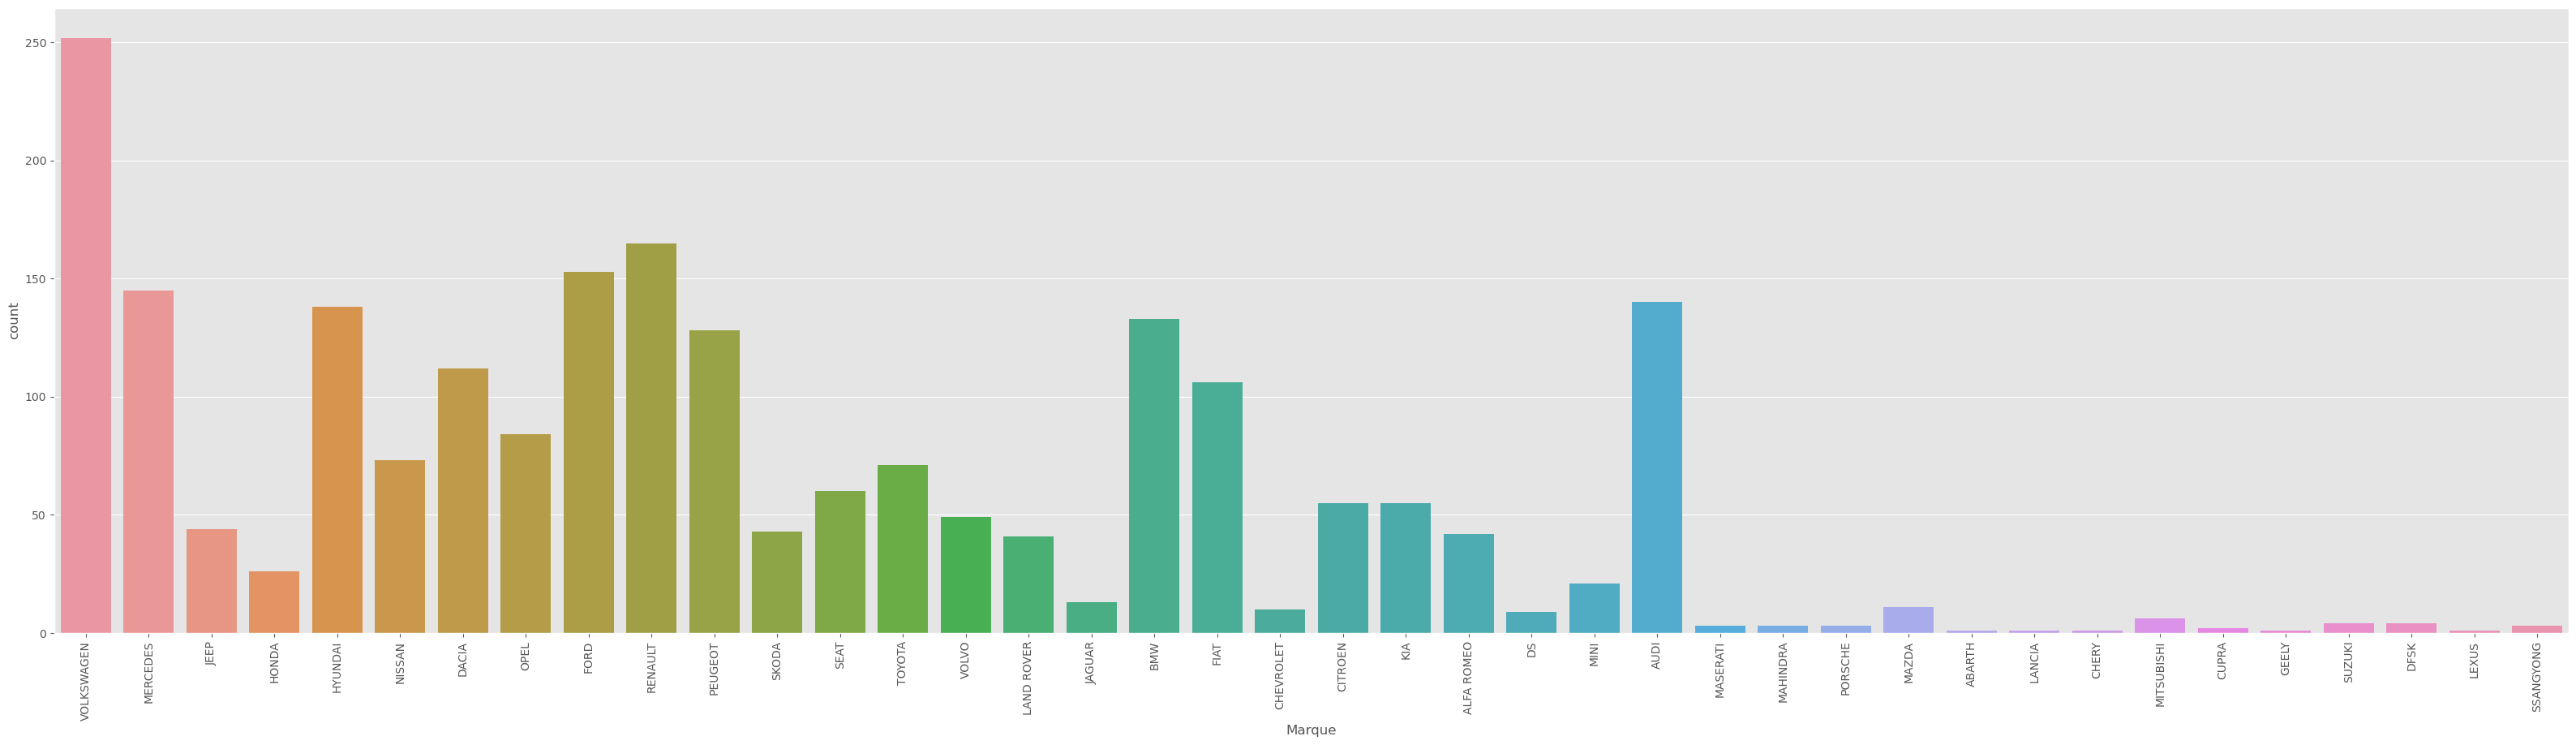

In [102]:
plt.figure(figsize=(40, 10))
sns.countplot(data=df, x="Marque")
plt.xticks(rotation=90)
plt.show()

### Carburant :

In [103]:
df["Carburant"].unique()

array(['Diesel', 'Essence', 'Hybride', 'Diesel MHEV'], dtype=object)

In [104]:
df['Carburant'].value_counts()

Carburant
Diesel         1900
Essence         272
Hybride          39
Diesel MHEV       1
Name: count, dtype: int64

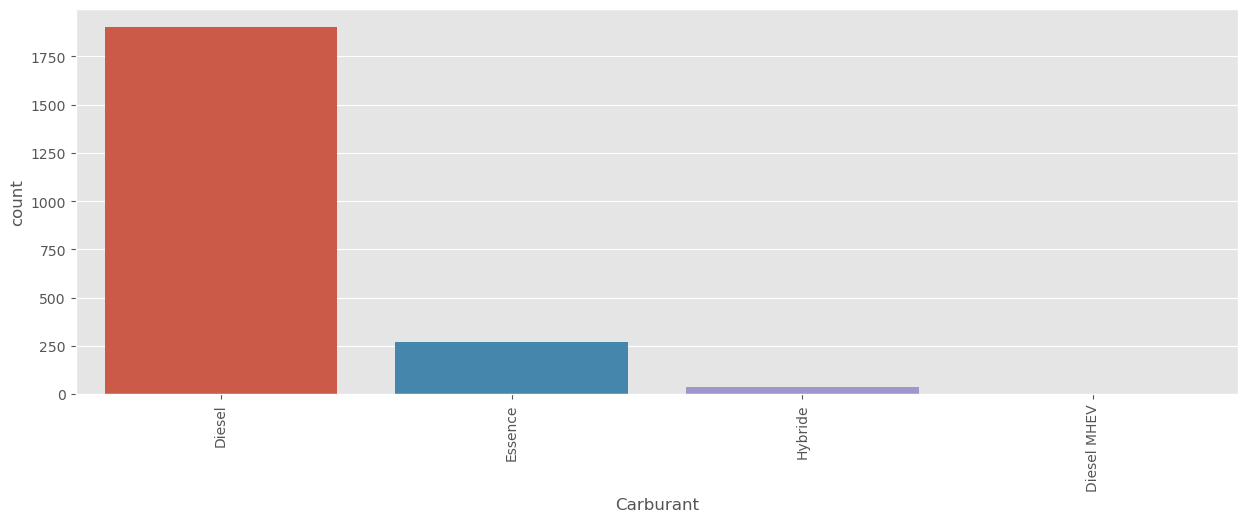

In [105]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="Carburant")
plt.xticks(rotation=90)
plt.show()

### Transmission :

In [106]:
df["Transmission"].unique()

array(['Automatique', 'Manuelle'], dtype=object)

In [107]:
df['Transmission'].value_counts()

Transmission
Manuelle       1194
Automatique    1018
Name: count, dtype: int64

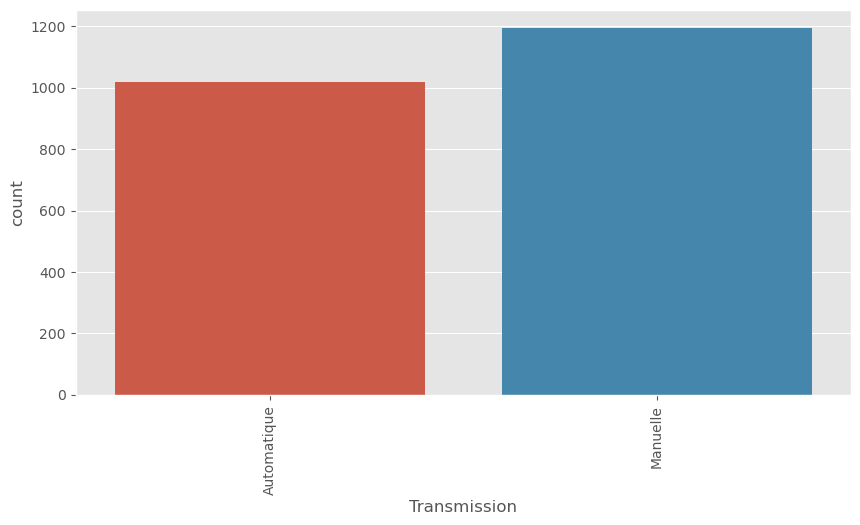

In [108]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Transmission")
plt.xticks(rotation=90)
plt.show()

### Couleur :

In [109]:
df["Couleur"].unique()

array(['Blanc', 'Bleu foncé', 'Noir', 'Autre couleur', 'Bleu', 'Rouge',
       'Gris clair', 'Blanc cassé', 'Gris', 'Gris foncé', 'Marron',
       'Bordeau', 'Beige', 'Vert foncé', "Jaune d'or", 'Marron clair',
       'Bleu ciel', 'Orange', 'Vert', 'Violet', 'Rose', 'Jaune'],
      dtype=object)

In [110]:
df['Couleur'].value_counts()

Couleur
Noir             664
Blanc            381
Gris             231
Gris foncé       219
Gris clair       146
Bleu foncé       119
Autre couleur    113
Bleu              59
Rouge             59
Marron            59
Blanc cassé       30
Beige             26
Marron clair      25
Bleu ciel         20
Bordeau           20
Vert foncé        16
Vert               8
Orange             7
Jaune d'or         5
Violet             3
Rose               1
Jaune              1
Name: count, dtype: int64

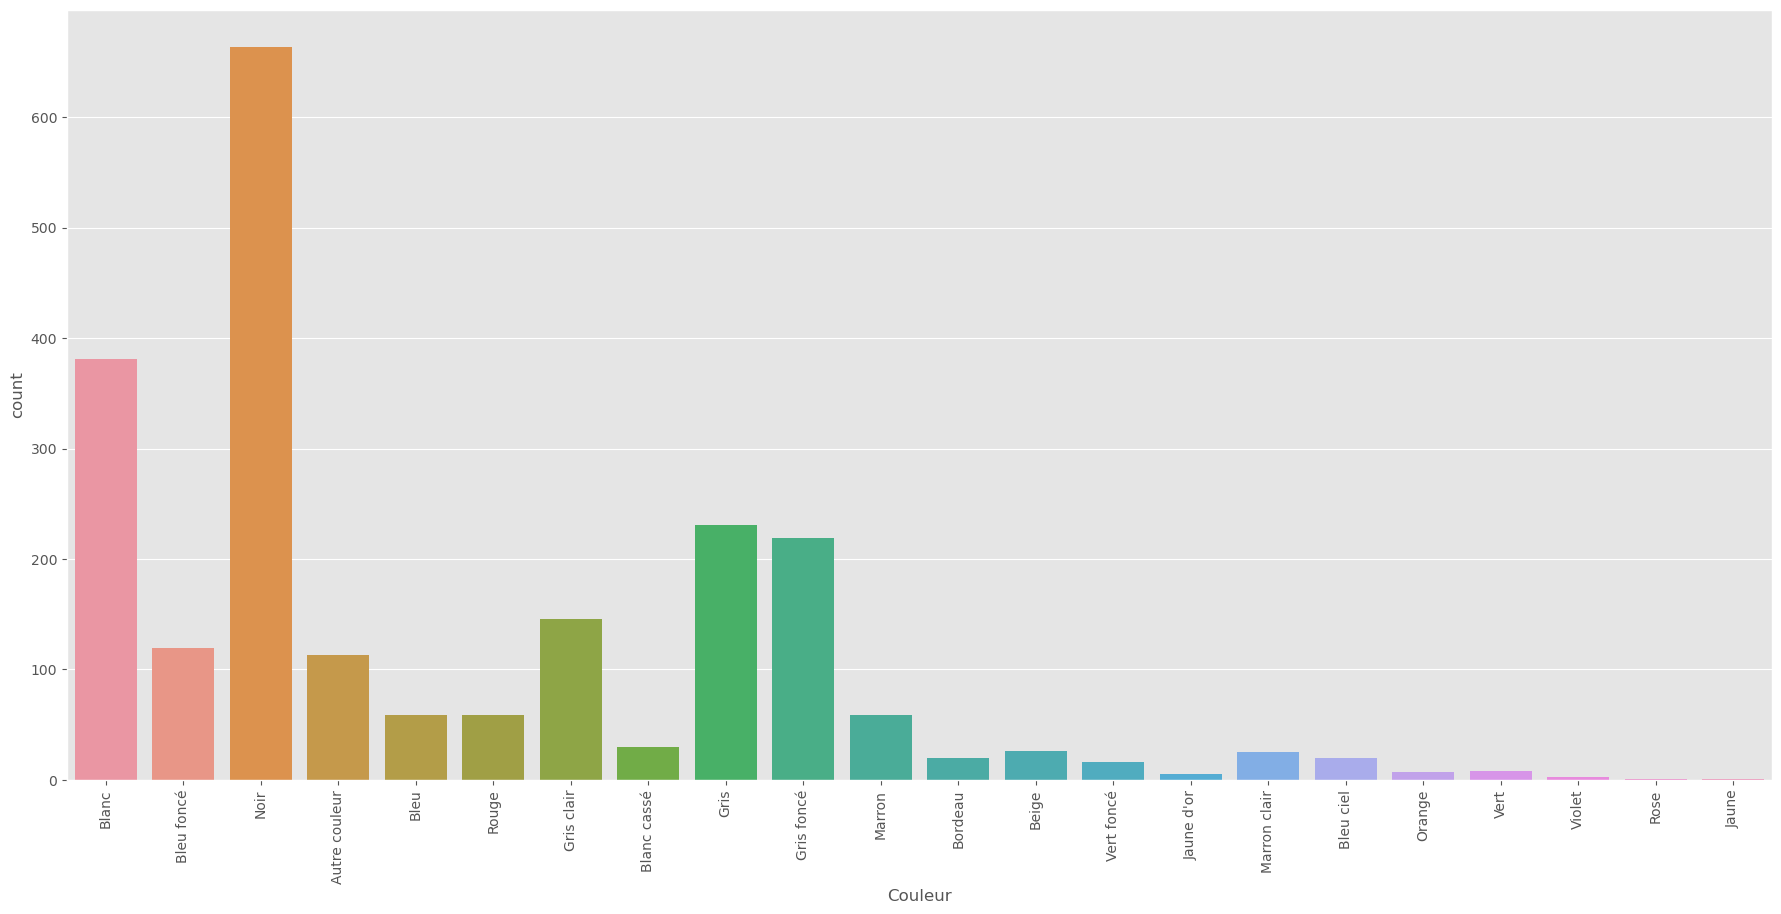

In [111]:
plt.figure(figsize=(22, 10))
sns.countplot(data=df, x="Couleur")
plt.xticks(rotation=90)
plt.show()

### Etat :

In [112]:
df["Etat"].unique()

array(['Excellent', 'Très bon', 'Comme neuve', 'Bon', 'Correct',
       'Avec dégât'], dtype=object)

In [113]:
df['Etat'].value_counts()

Etat
Excellent      931
Comme neuve    678
Très bon       496
Bon             99
Correct          6
Avec dégât       2
Name: count, dtype: int64

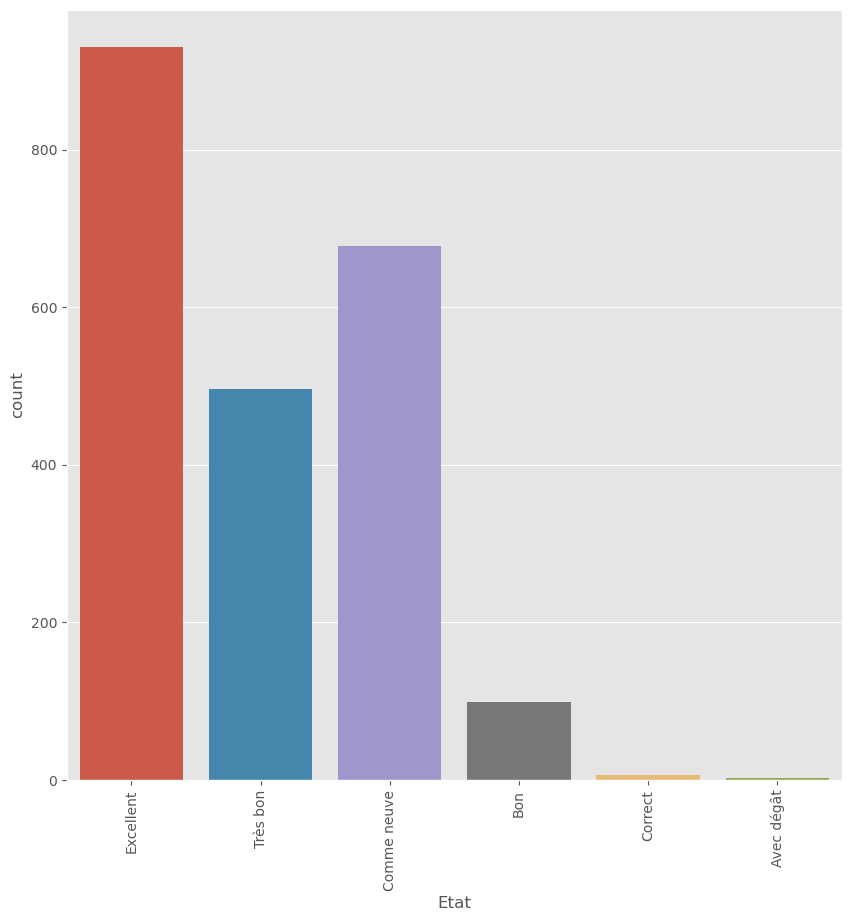

In [114]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x="Etat")
plt.xticks(rotation=90)
plt.show()

### Main : 

In [115]:
df["Main"].unique()

array(['Première', 'Seconde'], dtype=object)

In [116]:
df['Main'].value_counts()

Main
Première    1334
Seconde      878
Name: count, dtype: int64

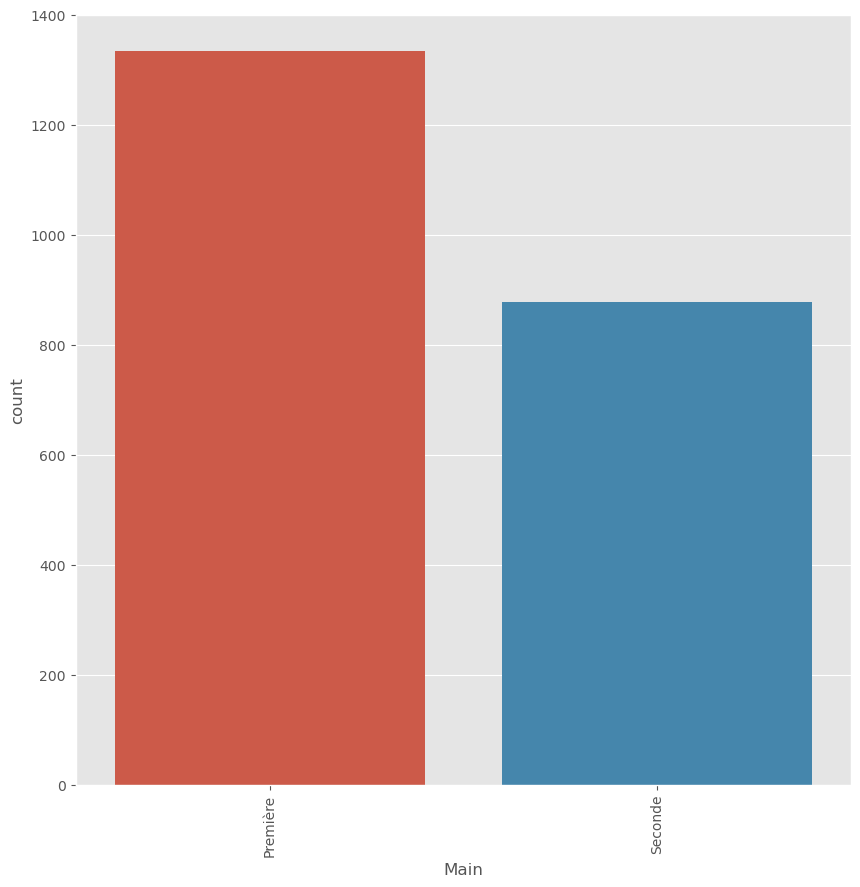

In [117]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x="Main")
plt.xticks(rotation=90)
plt.show()

### Vendeur : 

In [118]:
df["Vendeur"].unique()

array(['Particulier', 'Professionnel'], dtype=object)

In [119]:
df['Vendeur'].value_counts()

Vendeur
Particulier      2190
Professionnel      22
Name: count, dtype: int64

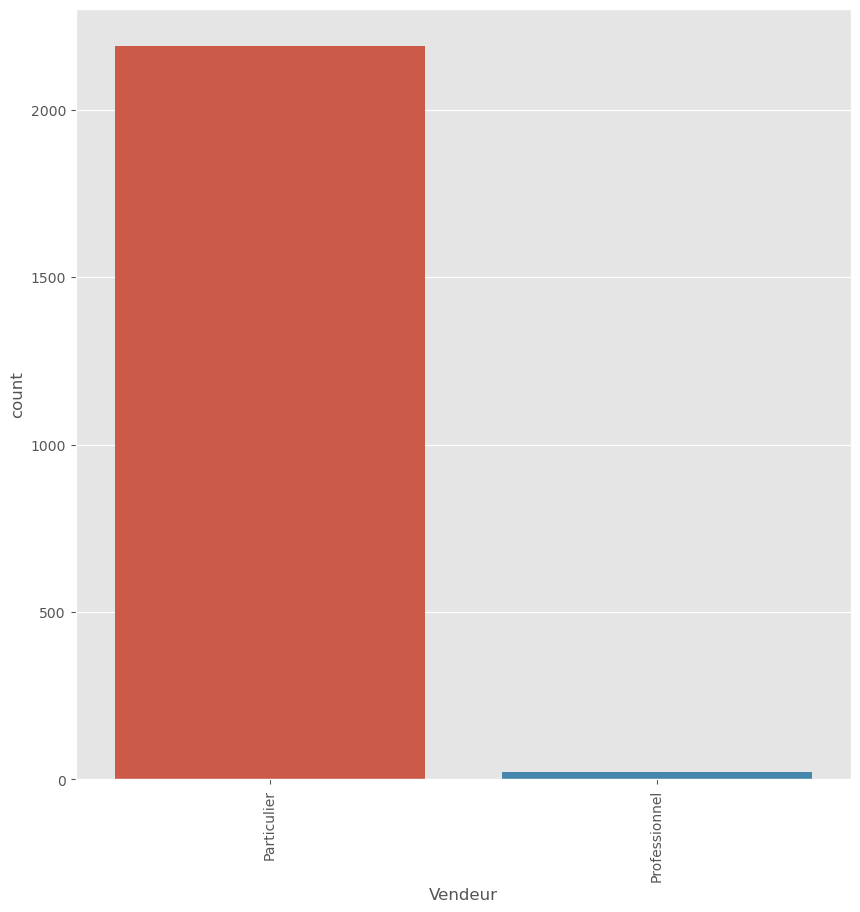

In [120]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x="Vendeur")
plt.xticks(rotation=90)
plt.show()

### Ville : 

In [121]:
df["Ville"].unique()

array(['Mohammadia', 'Temara', 'Rabat', 'Dakhla', 'Marrakech', 'Fès',
       'Casablanca', 'Agadir', 'Settat', 'Kénitra', 'Khouribga',
       'Tétouan', 'Guelmim', 'Sidi Kacem', 'Tanger', 'Meknès',
       'Beni Mellal', 'Salé', 'Khénifra', 'Berrechid', 'Oujda', 'Sefrou',
       'Laayoune', 'Ouarzazate', 'El Jadida', 'Khemissate', 'Safi',
       'Larache', 'Nador', 'Benslimane', 'Aït Melloul', 'Al Hoceima',
       'Errachidia', 'Chemmaia', 'Tiznit', 'Taourirt', 'Berkane', 'Taza',
       'Essaouira', 'Figuig', 'Skhirate', 'Boulmane', 'Kelaat Sraghna',
       'Taroudante'], dtype=object)

In [122]:
df['Ville'].value_counts()

Ville
Casablanca        995
Rabat             360
Marrakech         126
Tanger            101
Agadir             99
Kénitra            76
Fès                70
Salé               57
Mohammadia         44
Meknès             38
El Jadida          36
Temara             36
Tétouan            26
Oujda              15
Safi               15
Settat             12
Larache            12
Beni Mellal        11
Laayoune           10
Khouribga           9
Ouarzazate          7
Khénifra            6
Nador               5
Benslimane          5
Sidi Kacem          5
Tiznit              4
Khemissate          4
Dakhla              4
Aït Melloul         3
Berrechid           3
Guelmim             2
Errachidia          2
Sefrou              2
Taourirt            2
Figuig              1
Kelaat Sraghna      1
Boulmane            1
Skhirate            1
Al Hoceima          1
Essaouira           1
Taza                1
Berkane             1
Chemmaia            1
Taroudante          1
Name: count, dtype: int64

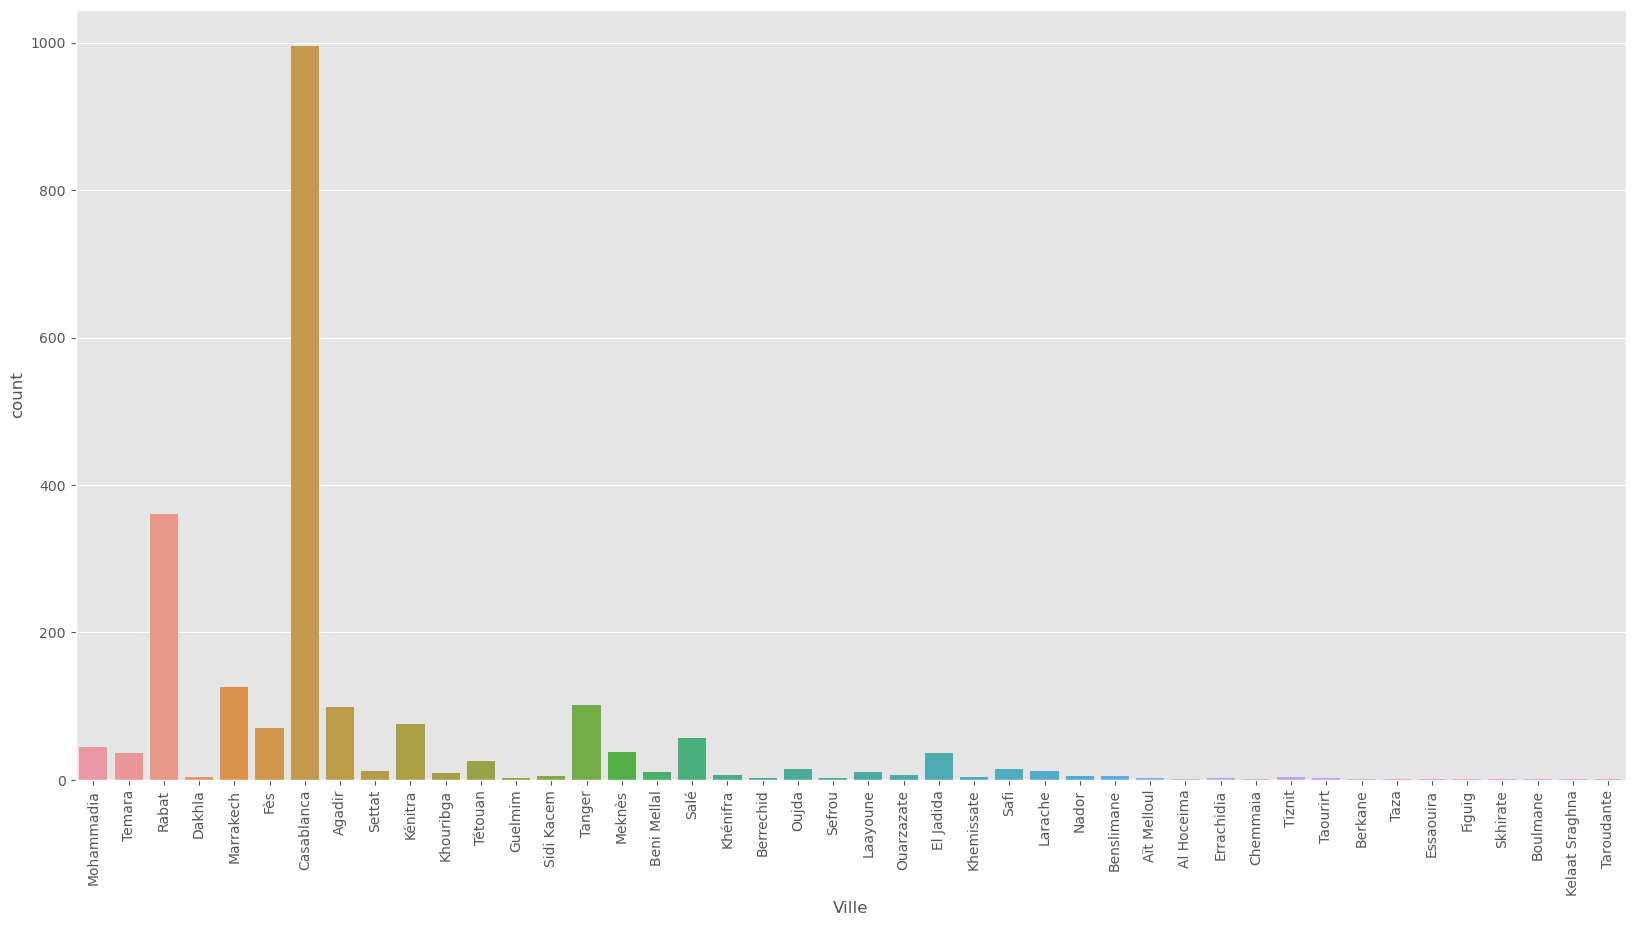

In [123]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x="Ville")
plt.xticks(rotation=90)
plt.show()

### Graphe a dispersion Animée : ( X : Annee, Y : Prix, Animation_frame : Marque, color : Carburant )

In [124]:
px.scatter(df,x="Annee",y="Prix",animation_frame="Marque",color="Carburant")

### Graphe a dispersion Animée : ( X : Ville, Y : Prix, Animation_frame : Marque, color : Carburant )

In [125]:
px.scatter(df,x="Ville",y="Prix",animation_frame="Marque",color="Carburant")

### Graphe a dispersion Animée : ( X : Etat, Y : Prix, Animation_frame : Marque, color : Carburant )

In [126]:
px.scatter(df,x="Etat",y="Prix",animation_frame="Marque",color="Carburant")

### Graphe a dispersion Animée : ( X : Couleur , Y : Prix, Animation_frame : Marque, color : Carburant )

In [127]:
px.scatter(df,x="Couleur",y="Prix",animation_frame="Marque",color="Carburant")

## Moyenne des Prix par ordre croissant pour la Marque et la Ville :

In [128]:
MoyenneMarque=df.groupby("Marque")["Prix"].mean()
MoyenneVille=df.groupby("Ville")["Prix"].mean()
MoyenneCarburant=df.groupby("Carburant")["Prix"].mean()

### Marque :

In [129]:
MoyenneMarque.sort_values()

Marque
GEELY          32000.000000
LANCIA         75000.000000
SSANGYONG      81000.000000
MAZDA          87090.909091
MAHINDRA       92333.333333
CHEVROLET      98700.000000
DACIA         108799.107143
HONDA         111923.076923
SUZUKI        116000.000000
CITROEN       120416.363636
RENAULT       125346.666667
FIAT          133169.811321
CHERY         140000.000000
MITSUBISHI    140500.000000
PEUGEOT       143898.437500
KIA           149672.727273
OPEL          150369.047619
FORD          153084.895425
HYUNDAI       157947.101449
MINI          164000.000000
NISSAN        165828.767123
SEAT          166539.583333
TOYOTA        178401.394366
SKODA         193744.162791
DFSK          200000.000000
VOLKSWAGEN    206956.384921
JEEP          247977.272727
ALFA ROMEO    254142.857143
BMW           254924.812030
JAGUAR        257769.230769
AUDI          268103.571429
DS            274222.222222
ABARTH        280000.000000
VOLVO         282877.551020
MERCEDES      322896.551724
LAND ROVER   

<Axes: xlabel='Marque'>

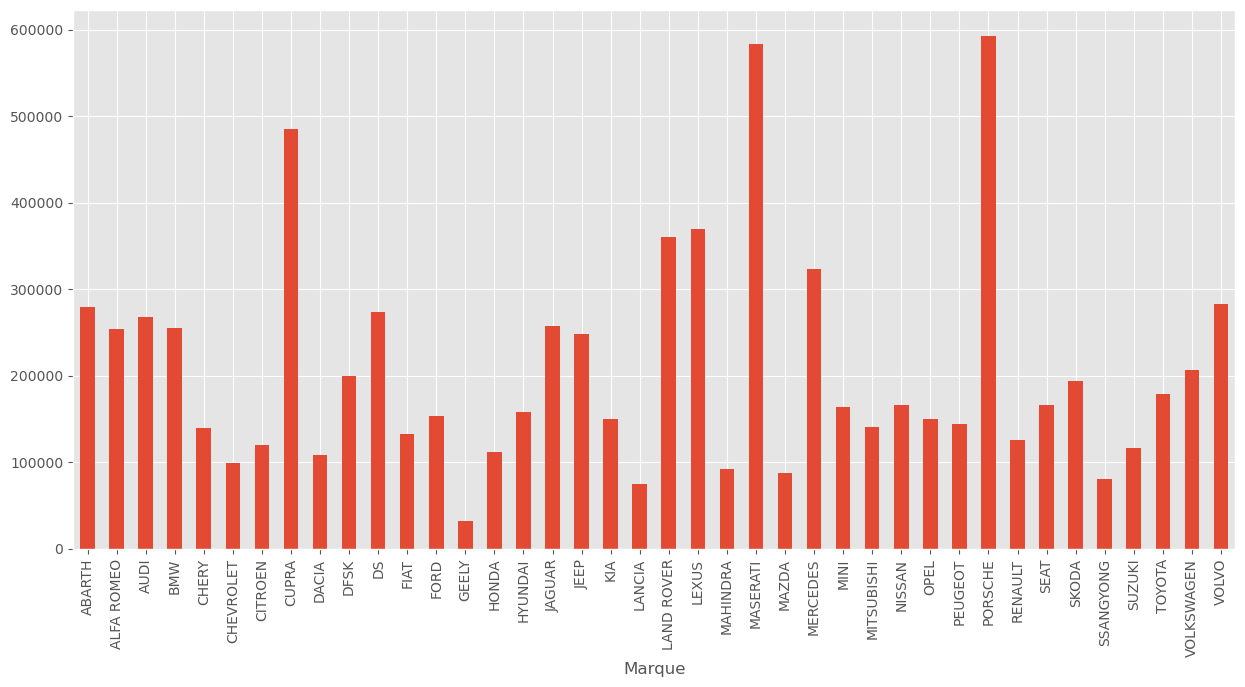

In [130]:
MoyenneMarque.plot(kind= "bar", figsize=(15,7))

### Ville :

In [131]:
MoyenneVille.sort_values()

Ville
Kelaat Sraghna     47000.000000
Taourirt           52500.000000
Skhirate           61000.000000
Errachidia         88500.000000
Tiznit            108250.000000
Chemmaia          110000.000000
Sefrou            113500.000000
Laayoune          118500.000000
Nador             123200.000000
Khemissate        126250.000000
Larache           127833.250000
Boulmane          129000.000000
Dakhla            131250.000000
Benslimane        137200.000000
Khouribga         137666.666667
Sidi Kacem        138200.000000
Taza              139000.000000
Guelmim           140000.000000
Berrechid         141000.000000
Khénifra          144166.666667
Berkane           145000.000000
Temara            145569.444444
Aït Melloul       146000.000000
Taroudante        150000.000000
Beni Mellal       150818.181818
Salé              151761.385965
Settat            151916.666667
Oujda             157866.666667
Ouarzazate        158000.000000
Safi              164000.000000
Kénitra           166381.578947
Ag

<Axes: xlabel='Ville'>

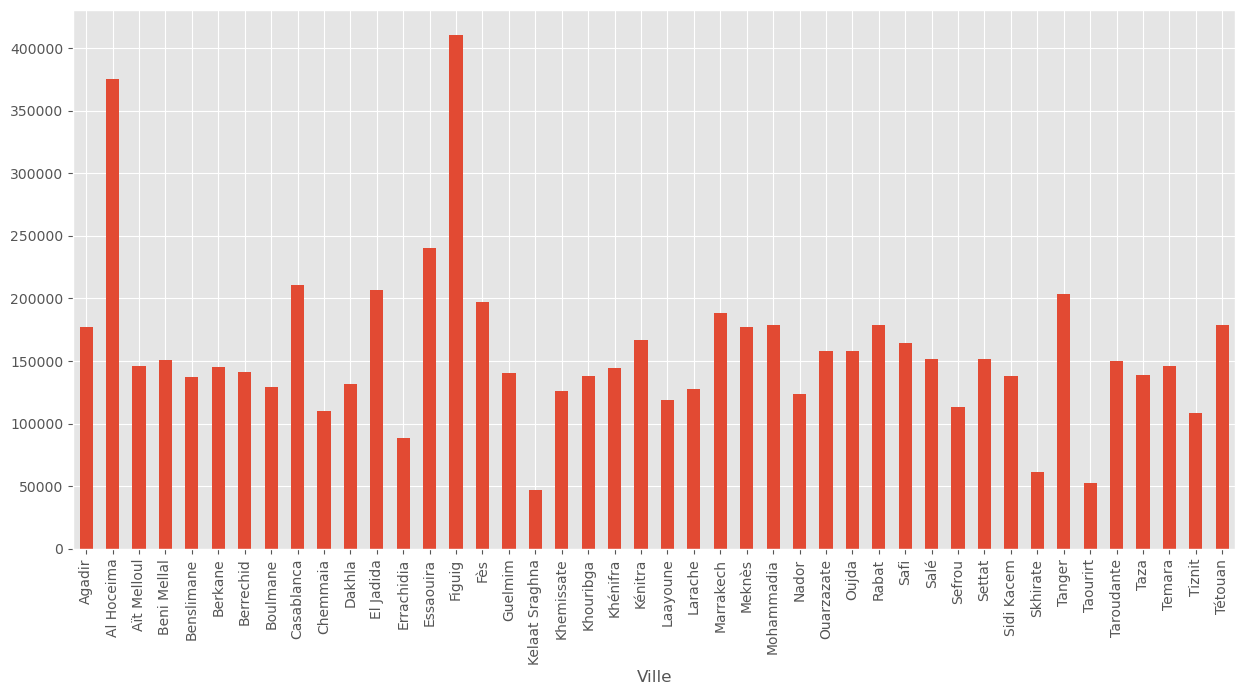

In [132]:
MoyenneVille.plot(kind= "bar", figsize=(15,7))

### Carburant :

In [133]:
MoyenneCarburant.sort_values()

Carburant
Essence        138122.698529
Diesel         197002.787895
Hybride        294910.256410
Diesel MHEV    600000.000000
Name: Prix, dtype: float64

<Axes: xlabel='Carburant'>

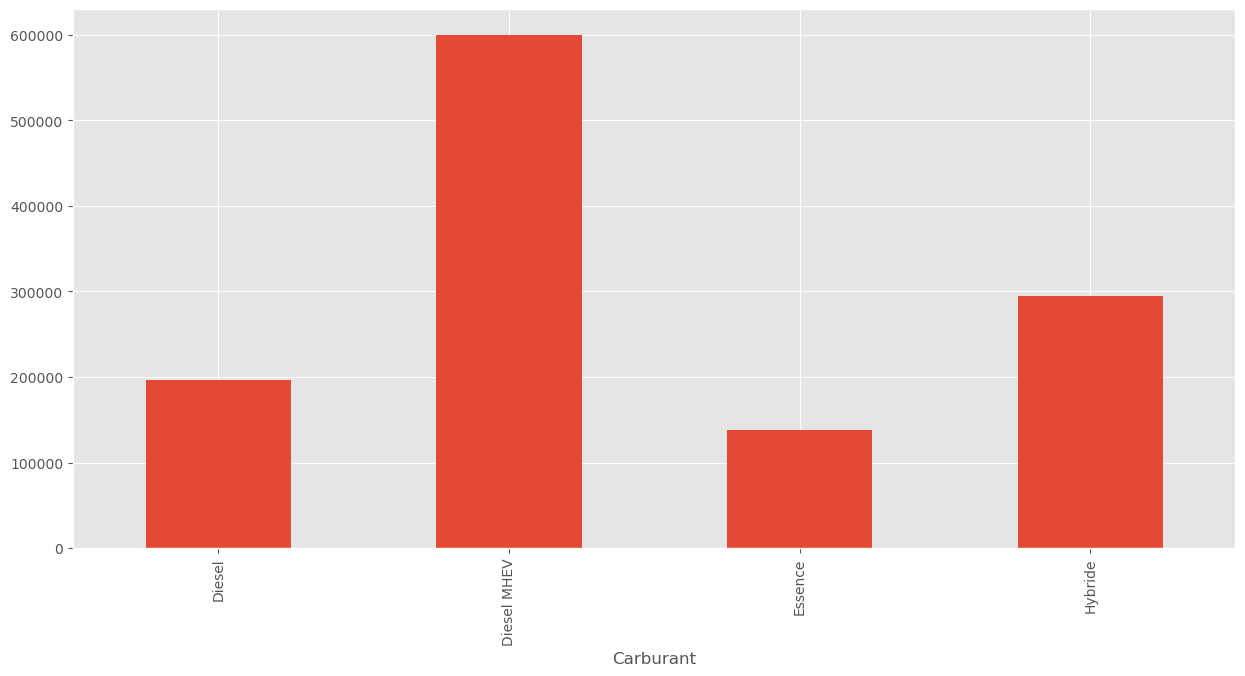

In [134]:
MoyenneCarburant.plot(kind= "bar", figsize=(15,7))

# Entrainement des modèles de prix de voitures ​

## Importation Modèles de predictions :

In [135]:
# Importation des modèles de scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Affichage des données :

In [136]:
df.head()

,Marque,Modele,Annee,Ville,Vendeur,Main,Kilometrage,Carburant,Transmission,Puissance_fiscale,Puissance_dynamique,Couleur,Etat,Prix
0,VOLKSWAGEN,CC,2017.0,Mohammadia,Particulier,Première,111000,Diesel,Automatique,8,140,Blanc,Excellent,185000
2,VOLKSWAGEN,Tiguan,2014.0,Mohammadia,Particulier,Seconde,204000,Diesel,Automatique,8,150,Bleu foncé,Excellent,215000
3,MERCEDES,Classe E,2010.0,Temara,Particulier,Seconde,255000,Diesel,Automatique,12,300,Noir,Très bon,150000
7,JEEP,Renegade,2020.0,Rabat,Particulier,Première,10700,Diesel,Automatique,6,120,Autre couleur,Excellent,200000
8,HONDA,CR-V,2009.0,Dakhla,Particulier,Seconde,270000,Diesel,Manuelle,9,150,Bleu,Très bon,90000


### Description des données ( count, mediane, ecart-type, min, max... )

In [137]:
df.describe().round(2)

,Annee,Kilometrage,Puissance_fiscale,Puissance_dynamique,Prix
count,2212.00,2212.00,2212.00,2212.00,2212.00
mean,2016.06,115030.28,7.57,135.91,191670.96
std,4.38,108903.49,2.68,55.59,127733.33
min,1992.00,0.00,5.00,6.00,0.00
25%,2014.00,55300.00,6.00,95.00,112000.00
50%,2017.00,100000.00,8.00,126.00,160000.00
75%,2019.00,154000.00,8.00,150.00,235000.00
max,2024.00,2500000.00,90.00,510.00,1630000.00


### Informations sur les types de données :

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 3056
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marque               2212 non-null   object 
 1   Modele               2212 non-null   object 
 2   Annee                2212 non-null   float64
 3   Ville                2212 non-null   object 
 4   Vendeur              2212 non-null   object 
 5   Main                 2212 non-null   object 
 6   Kilometrage          2212 non-null   int64  
 7   Carburant            2212 non-null   object 
 8   Transmission         2212 non-null   object 
 9   Puissance_fiscale    2212 non-null   int32  
 10  Puissance_dynamique  2212 non-null   int32  
 11  Couleur              2212 non-null   object 
 12  Etat                 2212 non-null   object 
 13  Prix                 2212 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(9)
memory usage: 241.9+ KB


### convertir les variables catégoriques en variables numériques

In [139]:
LE=LabelEncoder()
LE.fit(df["Marque"])
df["Marque"]=LE.transform(df["Marque"])

LE1=LabelEncoder()
LE1.fit(df["Modele"])
df["Modele"]=LE1.transform(df["Modele"])

LE2=LabelEncoder()
LE2.fit(df["Carburant"])
df["Carburant"]=LE2.transform(df["Carburant"])

LE3=LabelEncoder()
LE3.fit(df['Main'])
df['Main']=LE3.transform(df['Main'])

LE4=LabelEncoder()
LE4.fit(df['Couleur'])
df['Couleur']=LE4.transform(df['Couleur'])

LE5=LabelEncoder()
LE5.fit(df['Ville'])
df['Ville']=LE5.transform(df['Ville'])

LE6=LabelEncoder()
LE6.fit(df['Etat'])
df['Etat']=LE6.transform(df['Etat'])

LE7=LabelEncoder()
LE7.fit(df['Vendeur'])
df['Vendeur']=LE7.transform(df['Vendeur'])

LE8=LabelEncoder()
LE8.fit(df['Transmission'])
df['Transmission']=LE8.transform(df['Transmission'])

### Affichage des données :

In [140]:
df.head()

,Marque,Modele,Annee,Ville,Vendeur,Main,Kilometrage,Carburant,Transmission,Puissance_fiscale,Puissance_dynamique,Couleur,Etat,Prix
0,38,63,2017.0,26,0,0,111000,0,0,8,140,2,4,185000
2,38,257,2014.0,26,0,1,204000,0,0,8,150,6,4,215000
3,25,87,2010.0,41,0,1,255000,0,0,12,300,15,5,150000
7,17,221,2020.0,30,0,0,10700,0,0,6,120,0,4,200000
8,14,67,2009.0,10,0,1,270000,0,1,9,150,4,5,90000


### Répartition des données en ensembles d'entraînement et de test pour la prédiction des prix

In [141]:
#deviser le dataset en une base de donnees test et d'entrainement

X = df.drop(columns="Prix") # features        
y = df["Prix"]    # y = le target 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1769, 13)
X Test  :  (443, 13)
Y Train :  (1769,)
Y Test  :  (443,)


### Prédiction des prix avec un modèle de Régression Linéaire 

In [142]:
# model Linear Regression

LinearRegression_model=LinearRegression()

# fit model

LinearRegression_model.fit(X_train,y_train)

# Score model

print("Score du Modèle de Régression Linéaire  : ", LinearRegression_model.score(X_test,y_test))

Score du Modèle de Régression Linéaire  :  0.6471370440146804


### Prédiction des prix avec un modèle de Régression par Forêts Aléatoires

In [143]:
# model Random Forest Regressor

RandomForestRegressor_model=RandomForestRegressor()

# fit model

RandomForestRegressor_model.fit(X_train,y_train)

# Score model

print("Score du Modèle de Régression par Forêts Aléatoires : ", RandomForestRegressor_model.score(X_test,y_test))

Score du Modèle de Régression par Forêts Aléatoires :  0.8280742798170521


### Prédiction des prix avec un modèle de Régression par Extra Trees Regressor

In [144]:
# model Extra Trees Regressor

ExtraTreesRegressor_model=ExtraTreesRegressor()

# fit model

ExtraTreesRegressor_model.fit(X_train,y_train)

# Score model

print("Score du Modèle de Régression par Forêts Aléatoires : ", ExtraTreesRegressor_model.score(X_test,y_test))

Score du Modèle de Régression par Forêts Aléatoires :  0.8430526110851537


### Prédiction des prix avec un modèle de Régression par Gradient Boosting

In [145]:
# model Gradient Boosting Regressor 

GradientBoostingRegressor_model=GradientBoostingRegressor()

# fit model

GradientBoostingRegressor_model.fit(X_train,y_train)

# Score model

print("Score du Modèle de Régression par Gradient Boosting : ", GradientBoostingRegressor_model.score(X_test,y_test))

Score du Modèle de Régression par Gradient Boosting :  0.8290723285749787


### Validation croisée pour l'évaluation des modèles de prédiction des prix

In [146]:
from sklearn.model_selection import cross_val_score

### Évaluation de la régression linéaire par validation croisée

In [147]:
cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean() 

0.5591789818364619

### Évaluation de la Régression par Forêts Aléatoires par validation croisée

In [148]:
cross_val_score(RandomForestRegressor(), X_train, y_train, cv=5).mean() 

0.7339897539662095

### Évaluation de la Modèle de Régression par Extra Trees Regressor par validation croisée

In [149]:
cross_val_score(ExtraTreesRegressor(), X_train, y_train, cv=5).mean() 

0.7127665656548535

### Évaluation de la Modèle de Régression par Gradient Boosting par validation croisée

In [150]:
cross_val_score(GradientBoostingRegressor(), X_train, y_train, cv=5).mean() 

0.7140546929378978

## Maitenant Enregistrons nos modèles de prédictions ! 

In [151]:
import pickle as pk

In [152]:
pk.dump(LinearRegression_model,open('LRmodel.pkl','wb'))

In [153]:
pk.dump(RandomForestRegressor_model,open('RFRmodel.pkl','wb'))

In [154]:
pk.dump(ExtraTreesRegressor_model,open('ETRmodel.pkl','wb'))

In [155]:
pk.dump(GradientBoostingRegressor_model,open('GBRmodel.pkl','wb'))